### **For Farward Datafram**

# **Importing useful libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# **Part 1: EDA**

**Loading and Verifying the Dataset from a file.**



Load the dataset `ds_salaries.csv`, into a pandas DataFrame variable called df.

In [62]:
df = pd.read_csv('ds_salaries.csv')



Visualize the first five rows.

In [63]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##**Explore the structure of the data**

### **Check the number of records and features in the dataset**

In [64]:
num_records, num_features = df.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 3755
Number of features: 11


### **Names of Features**

In [65]:
for column in df.columns:
    print(column)

work_year
experience_level
employment_type
job_title
salary
salary_currency
salary_in_usd
employee_residence
remote_ratio
company_location
company_size


### **Display the data types of each Feature**

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


*there are 4 numerical features and 7 categorical features*


### **To view the first few records in the dataset**

In [67]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M



### **The unique values in each feature**



In [68]:
print("NUMBER OF UNIQUE VALUES:\n")
print(df.nunique())

NUMBER OF UNIQUE VALUES:

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


In [69]:
unique_work_years = df["work_year"].unique()
print("unique_work_years = ", unique_work_years)

unique_work_years = df["experience_level"].unique()
print("unique_experience_level = ", unique_work_years)

unique_work_years = df["employment_type"].unique()
print("unique_employment_type = ", unique_work_years)

unique_work_years = df["remote_ratio"].unique()
print("unique_remote_ratio = ", unique_work_years)

unique_work_years = df["company_size"].unique()
print("unique_company_size = ", unique_work_years)


unique_work_years =  [2023 2022 2020 2021]
unique_experience_level =  ['SE' 'MI' 'EN' 'EX']
unique_employment_type =  ['FT' 'CT' 'FL' 'PT']
unique_remote_ratio =  [100   0  50]
unique_company_size =  ['L' 'S' 'M']


- There are 4 categorical values in the column "experience_level":
  *   EN = Entry-level
  *   MI = Mid-level
  *   SE = Senior-level
  *   EX = Executive-level
- There are 4 categorical values in the column "employment_type":
  *   FT = Full-time
  *   PT = Part-time
  *   CT = Contract
  *   FL = Freelancer
- There are 3 categorical values in the column "remote_ratio":
  *   100 = Remotely
  *   50 = Hybrid
  *   0 = On-site

## **Data Visualization**

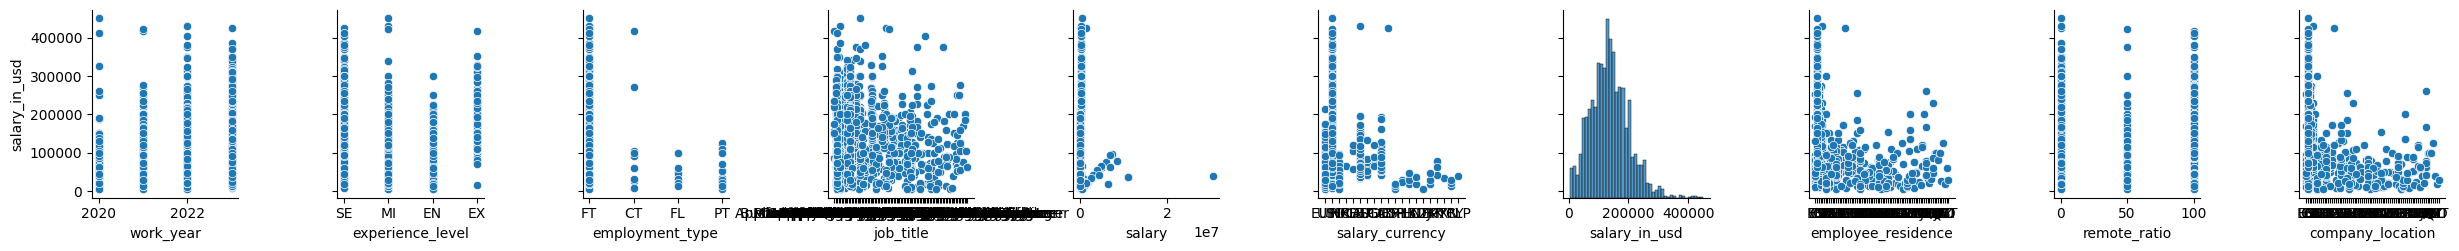

In [70]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars='salary_in_usd', kind='scatter')
plt.show()


Top 10 jobs for each work year

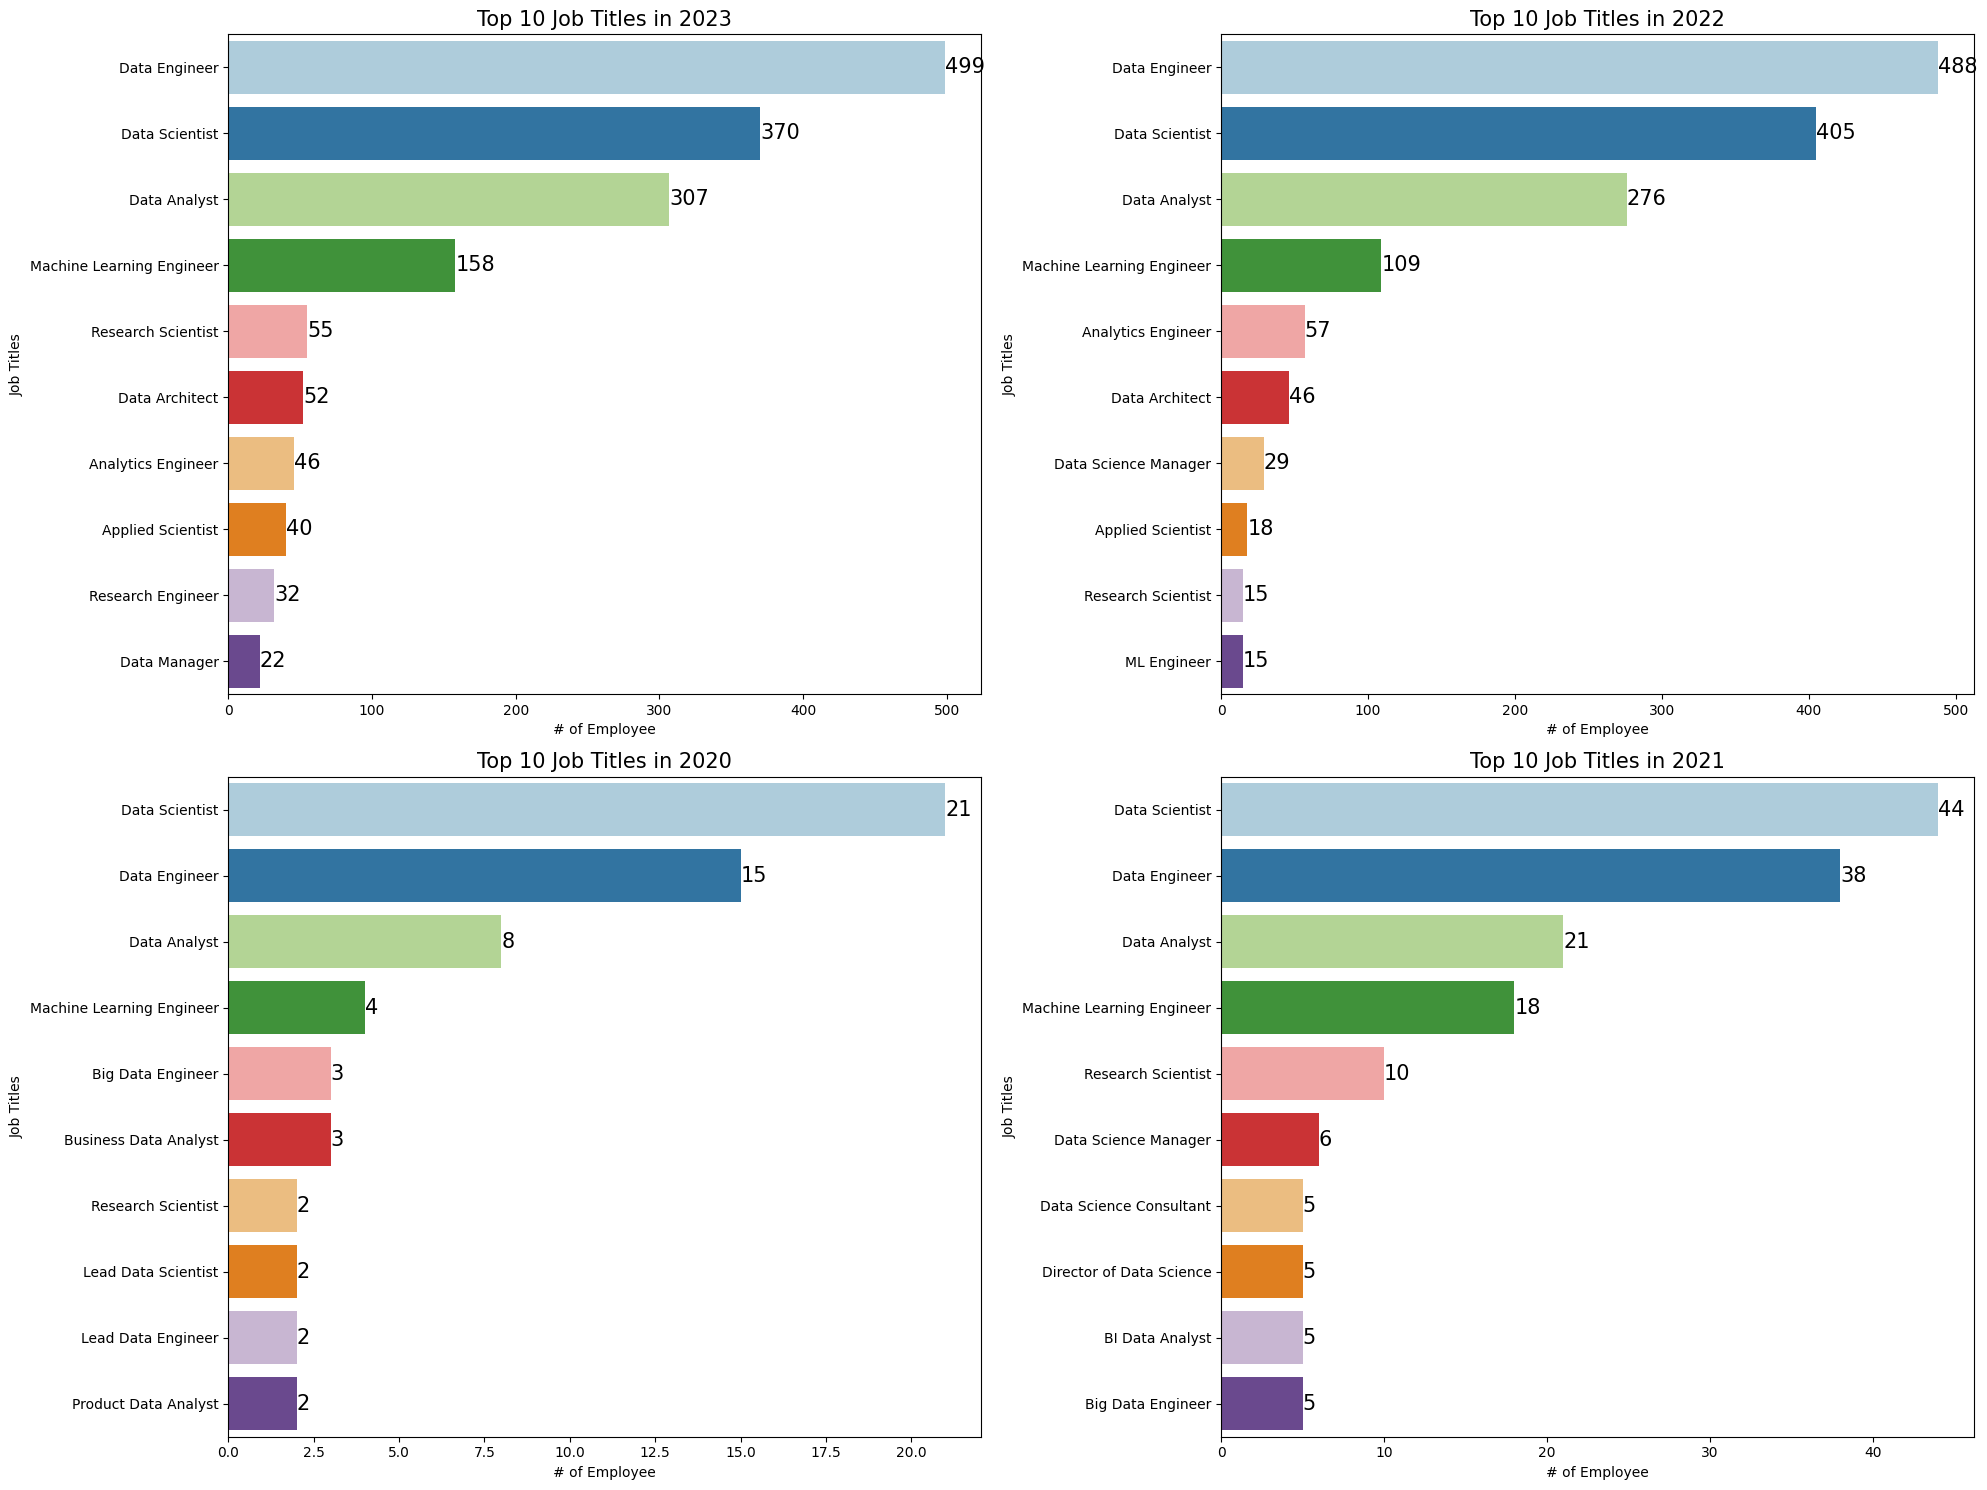

In [71]:
a = 2
b = 2
c = 1
fig = plt.figure(figsize = (20, 15))

for year in df.work_year.unique():
    dft = df[df['work_year']==year]['job_title'].value_counts().nlargest(10).reset_index()

    plt.subplot(a, b, c)
    ax = sns.barplot(data = dft , y = dft['index'], x = dft.job_title, palette="Paired")
    plt.ylabel('Job Titles')
    plt.xlabel('# of Employee')
    plt.title(f'Top 10 Job Titles in {year}', size=15)
    ax.bar_label(ax.containers[0], size=15)
    c = c + 1

plt.tight_layout()
plt.show()

In [72]:
sns.set(style="darkgrid")

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

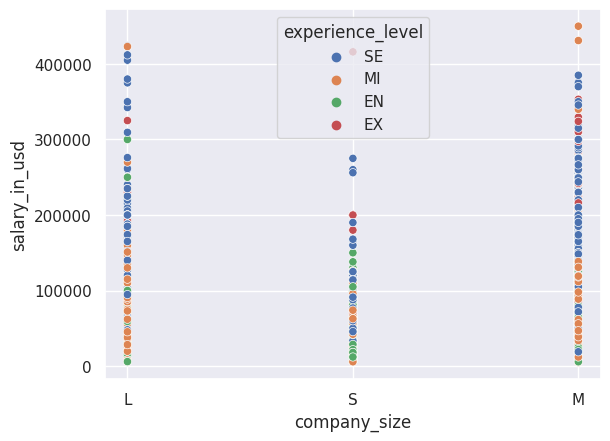

In [73]:
sns.scatterplot(x='company_size',y='salary_in_usd',hue='experience_level',data=df)

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

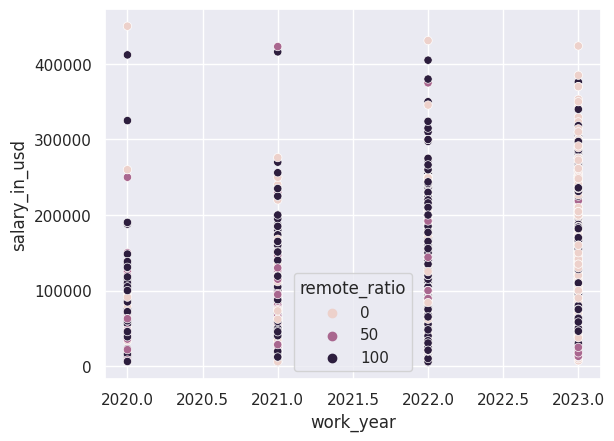

In [74]:
sns.scatterplot(x='work_year',y='salary_in_usd',hue='remote_ratio',data=df)

## **Statisatical Summary of the numerical features**

Compute count, mean, standard deviation, minimum, maximum, first, median and third quartile of the dataframe.

In [75]:
df[['salary_in_usd']].describe()


,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


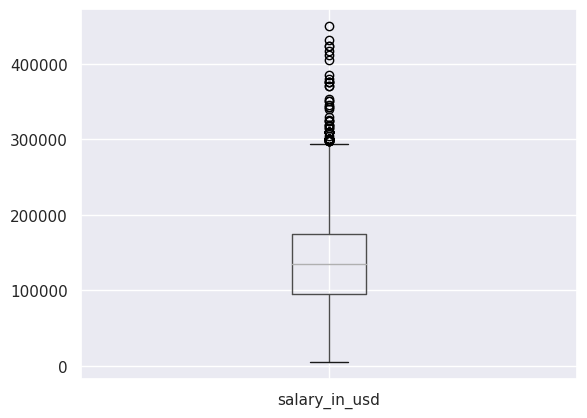

In [76]:
df.boxplot('salary_in_usd')
plt.show()

**Cheking the Existing of outliers**

Q1=95000


---


Q3=175000


---


IQR=Q3-Q1=80000


---


Q1-1.5*IQR = -25000 < 5132 there is no outliers


---


Q3+1.5*IQR= 295000 < 450000 there are outliers


---




# **Data Cleaning**

### **Count the number of missing values in each column**

In [77]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

*There is no missing data*

### **Removing duplicates**





In [78]:
df.drop_duplicates(inplace=True)

In [79]:
num_records, num_features = df.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 2584
Number of features: 11


### **Removing Outliers**

In [80]:

salary_column = 'salary_in_usd'
threshold_salary = 295000
df = df[df[salary_column] <= threshold_salary]
df.reset_index(drop=True, inplace=True)


In [81]:
num_records, num_features = df.shape
print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

Number of records: 2537
Number of features: 11


## **Data Preprocessing**

**Transformation of Categorical data into numerical data**

### **Label Encoding**

In [82]:
# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Select the columns to encode
columns_to_encode = ['job_title', 'employee_residence', 'company_location','experience_level', 'employment_type', 'remote_ratio', 'company_size']

# Apply label encoding to each selected column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

<ipython-input-82-9bbd61b73e65>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-9bbd61b73e65>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-9bbd61b73e65>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-9bbd61b

In [83]:
df.shape

(2537, 11)

In [84]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,83,80000,EUR,85847,26,2,25,0
1,2023,2,0,65,30000,USD,30000,74,2,70,2
2,2023,2,0,65,25500,USD,25500,74,2,70,2
3,2023,3,2,46,175000,USD,175000,11,2,12,1
4,2023,3,2,46,120000,USD,120000,11,2,12,1
5,2023,3,2,8,222200,USD,222200,74,0,70,0
6,2023,3,2,8,136000,USD,136000,74,0,70,0
7,2023,3,2,46,219000,USD,219000,11,0,12,1
8,2023,3,2,46,141000,USD,141000,11,0,12,1
9,2023,3,2,46,147100,USD,147100,74,0,70,1


### **Correlation Matrix**

<ipython-input-85-00ee5d2ee3b8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

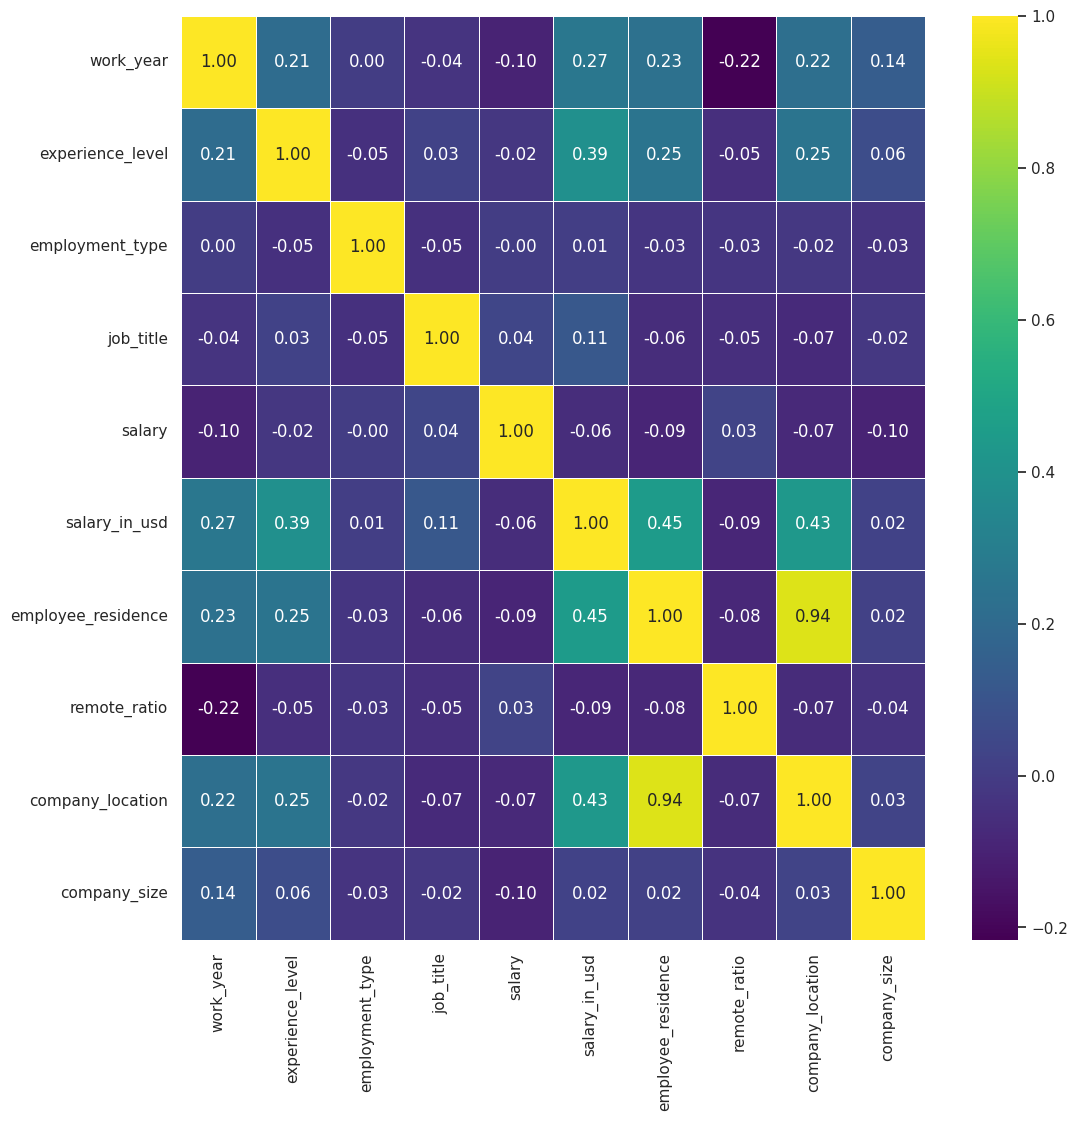

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,cmap="viridis",fmt=".2f")



* company_size_M feature is positevly correlated to comapny_size_L feature.
*company_location feature is posituvely correlated to the employee_residence feature feature.
*employement_type_pt feature is positively correlated to employement_type_ft feature


---
we can remove Company_size_L, employee residence, employment_type_ft features from the data set.






### **Removing unnecessary features**

**To assess the independent impact of company_location and employee_residence on the target variable**

In [86]:
features = df[['company_location', 'employee_residence']]

target = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display the VIF values
print(vif_data)


              Feature        VIF
0    company_location  77.098057
1  employee_residence  77.098057



The VIF values for both company_location and employee_residence are high (77.1). This indicates a high degree of multicollinearity between these two features, suggesting that they are providing redundant information in the context of a linear regression model.

In [87]:
df.drop(['company_location'], axis=1, inplace=True)

Low VIF (close to 1): Indicates that the variance of the coefficients for these features is not significantly inflated, and they are relatively independent of each other. This is generally a positive sign, as it suggests that these features can be included in the model

These two features are idepandent.

**Because we are going to consider the salary_in_usd feature as the target feature, we are going to drop the salary and salary currency from the dataframe**

In [88]:
df.drop(['salary','salary_currency'], axis=1, inplace=True)

In [89]:
df.shape

(2537, 8)

df.dtypes

### **Standard Scaling**

**scale the salary in USD**

In [90]:
sal = df['salary_in_usd'].values.reshape(-1, 1)
s = StandardScaler()
df['salary_in_usd'] = s.fit_transform(sal)

**standard scaling for work year**

In [91]:
sc=StandardScaler()
df["work_year"]=sc.fit_transform(df[['work_year']])



In [92]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,0.937443,3,2,83,-0.714649,26,2,0
1,0.937443,2,0,65,-1.627516,74,2,2
2,0.937443,2,0,65,-1.701073,74,2,2
3,0.937443,3,2,46,0.742633,11,2,1
4,0.937443,3,2,46,-0.156389,11,2,1


### **Feature Selection**

**Sequential Forward Selection**

In [93]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

# Separate the features (X) and the target variable (y)
X = df.drop(columns=["salary_in_usd"])  # Exclude the target variable "salary_in_usd"
y = df["salary_in_usd"]

# Create a feature selector object
feature_selector = SequentialFeatureSelector(estimator=RandomForestRegressor(),
                                             n_features_to_select='auto',
                                             direction='forward',
                                             scoring='r2',
                                             cv=5)

# Perform feature selection
selected_features = feature_selector.fit_transform(X, y)

# Get the selected feature names
feature_names = list(X.columns[feature_selector.get_support()])

# Print the selected feature names
print("Selected Features:")
print(feature_names)



Selected Features:
['experience_level', 'job_title', 'employee_residence']


In [94]:
df_forward = df[feature_names]

In [95]:
df_forward.head()

,experience_level,job_title,employee_residence
0,3,83,26
1,2,65,74
2,2,65,74
3,3,46,11
4,3,46,11


**Sequential Backward Selection**

In [96]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Separate the features (X) and the target variable (y)
X = df.drop(columns=["salary_in_usd"])  # Exclude the target variable "salary_in_usd"
y = df["salary_in_usd"]

# Create a feature selector object
estimator = RandomForestRegressor()
feature_selector = RFE(estimator, n_features_to_select=5, step=1)

# Perform feature selection
selected_features = feature_selector.fit_transform(X, y)

# Get the selected feature names
feature_names = list(X.columns[feature_selector.support_])

# Print the selected feature names
print("Selected Features:")
print(feature_names)


Selected Features:
['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio']


In [97]:
df_backword = df[feature_names]

In [98]:
df_backword.head()

,work_year,experience_level,job_title,employee_residence,remote_ratio
0,0.937443,3,83,26,2
1,0.937443,2,65,74,2
2,0.937443,2,65,74,2
3,0.937443,3,46,11,2
4,0.937443,3,46,11,2


**using linear regression in Sequential Forward Selection**

In [99]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Separate the features (X) and the target variable (y)
X = df.drop(columns=["salary_in_usd"])  # Exclude the target variable "salary_in_usd"
y = df["salary_in_usd"]

# Create a feature selector object with Linear Regression as the estimator
feature_selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                             n_features_to_select='auto',
                                             direction='forward',
                                             scoring='r2',
                                             cv=5)

# Perform feature selection
selected_features = feature_selector.fit_transform(X, y)

# Get the selected feature names
feature_names = list(X.columns[feature_selector.get_support()])

# Print the selected feature names
print("Selected Features:")
print(feature_names)


Selected Features:
['work_year', 'experience_level', 'employee_residence']


## **Training & Testing Sets**

### **for the first dataframe(after forward)**

In [100]:
Xf = df_forward
yf = df['salary_in_usd']  #the target variable

# Split the data into training and test sets
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)

In [101]:
# Print the shapes of the resulting datasets
print("Training set shape:", Xf_train.shape, yf_train.shape)
print("Test set shape:", Xf_test.shape, yf_test.shape)


Training set shape: (2029, 3) (2029,)
Test set shape: (508, 3) (508,)


### **for the second dataframe(after backward)**

In [102]:
Xb = df_backword
yb = df['salary_in_usd']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

In [103]:
print("Training set shape:", Xb_train.shape, yb_train.shape)
print("Test set shape:", Xb_test.shape, yb_test.shape)

Training set shape: (2029, 5) (2029,)
Test set shape: (508, 5) (508,)


### **for the original dataframe**

In [104]:
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (2029, 7) (2029,)
Test set shape: (508, 7) (508,)


# **Models**

## **Linear Regression**

In [106]:
def evaluate_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    # Create a polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print scores
    print("Train score: ", model.score(X_train, y_train))
    print("R2 score: ", r2_score(y_test, y_pred))

    # Scatter plot of predicted vs. true values
    plt.figure()
    plt.scatter(y_pred, y_test)
    plt.xlabel("Model Predictions")
    plt.ylabel("True Value")
    plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], '-', color="r")
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.show()


### **Order 1**

### **For Farward Datafram**

Forward Dataframe:

Train score:  0.2897454694271945
R2 score:  0.32799396328694586


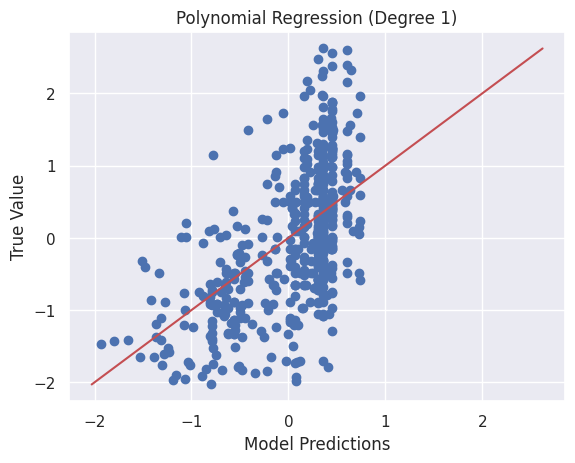

In [107]:
print("Forward Dataframe:\n")
evaluate_polynomial_regression(1, Xf_train, yf_train, Xf_test, yf_test)

### **For Backword Dataframe**

Backward Dataframe:

Train score:  0.3057956623313297
R2 score:  0.341995174173629


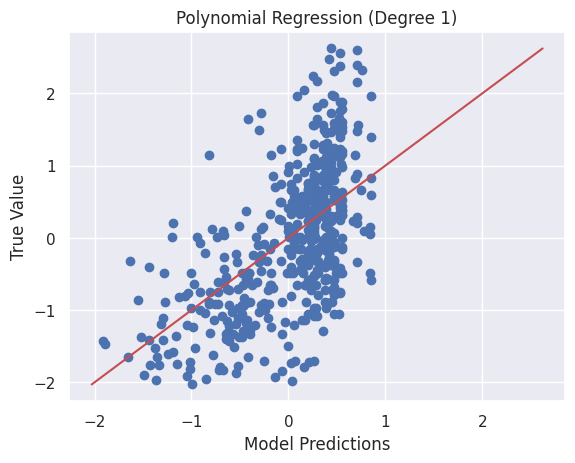

In [108]:
print("Backward Dataframe:\n")
evaluate_polynomial_regression(1, Xb_train, yb_train, Xb_test, yb_test)

### **For Original DataFrame**

Original Dataframe:

Train score:  0.3069878278962006
R2 score:  0.34499152746718753


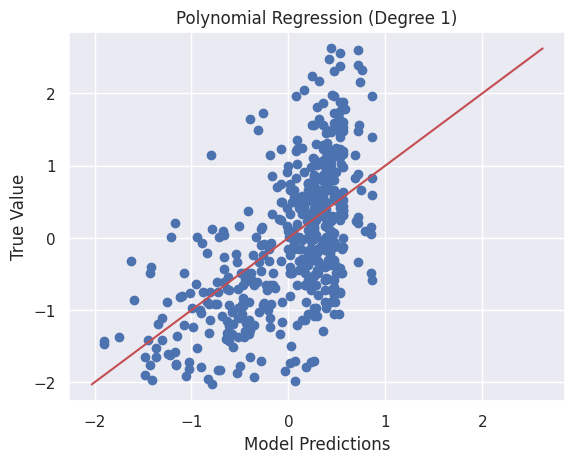

In [109]:
print("Original Dataframe:\n")
evaluate_polynomial_regression(1, X_train, y_train, X_test, y_test)

### **Order 2**

### **For Farward Datafram**

Forward Dataframe:

Train score:  0.3548515041821979
R2 score:  0.3584446442581175


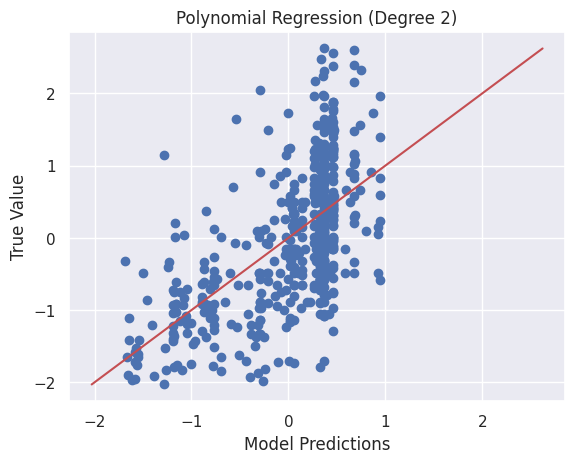

In [110]:
print("Forward Dataframe:\n")
evaluate_polynomial_regression(2, Xf_train, yf_train, Xf_test, yf_test)

### **For Backword Dataframe**

Backward Dataframe:

Train score:  0.3717508565993496
R2 score:  0.3671115875240294


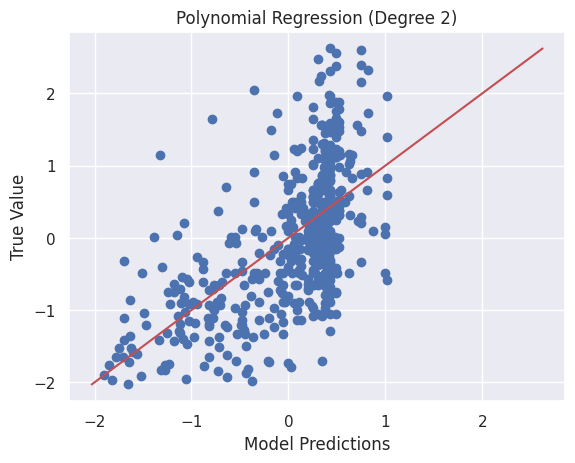

In [111]:
print("Backward Dataframe:\n")
evaluate_polynomial_regression(2, Xb_train, yb_train, Xb_test, yb_test)

### **For Original DataFrame**

Original Dataframe:

Train score:  0.3851944304008371
R2 score:  0.32176460803187523


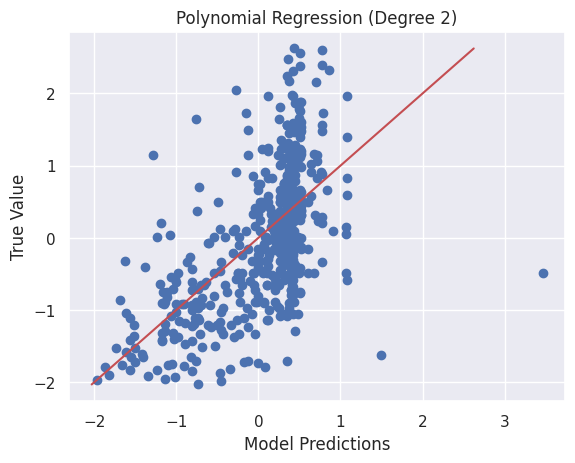

In [112]:
print("Original Dataframe:\n")
evaluate_polynomial_regression(2, X_train, y_train, X_test, y_test)

### **Order 3**

### **For Farward Datafram**

Forward Dataframe:

Train score:  0.43074845427147834
R2 score:  0.4336903121748682


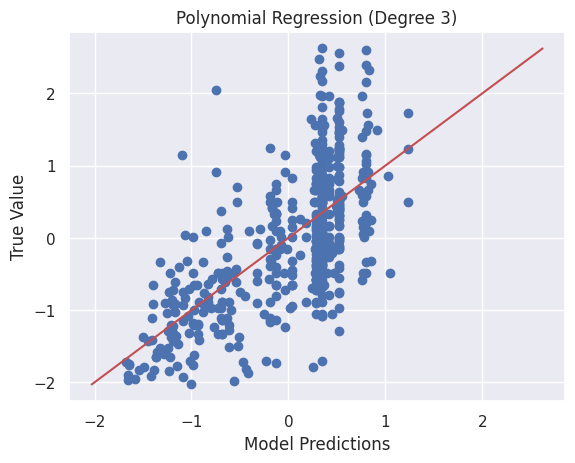

In [113]:
print("Forward Dataframe:\n")
evaluate_polynomial_regression(3, Xf_train, yf_train, Xf_test, yf_test)

### **For Backword Dataframe**

Backward Dataframe:

Train score:  0.44945785652686565
R2 score:  0.4317889780753478


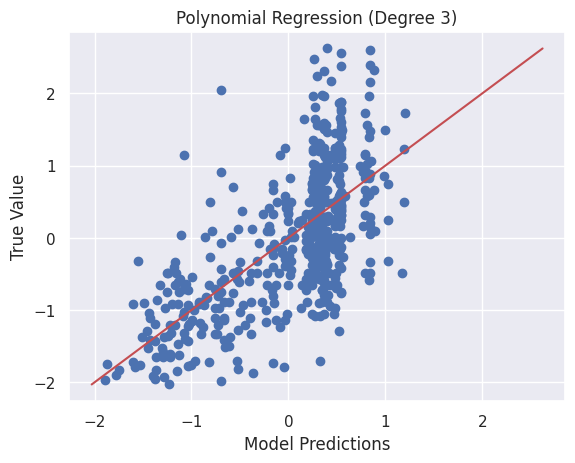

In [114]:
print("Backward Dataframe:\n")
evaluate_polynomial_regression(3, Xb_train, yb_train, Xb_test, yb_test)

### **For Original DataFrame**

Original Dataframe:

Train score:  0.4693630343427342
R2 score:  0.3218567991913486


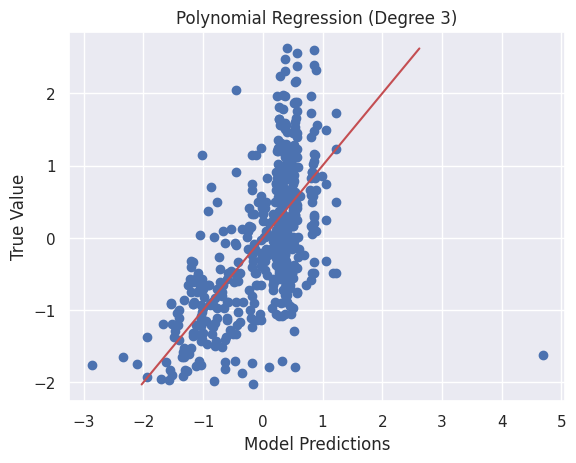

In [115]:
print("Original Dataframe:\n")
evaluate_polynomial_regression(3, X_train, y_train, X_test, y_test)

### **Order 10**

### **For Farward Datafram**

Forward Dataframe:

Train score:  0.49780968904255696
R2 score:  -2.8474091970487336e-05


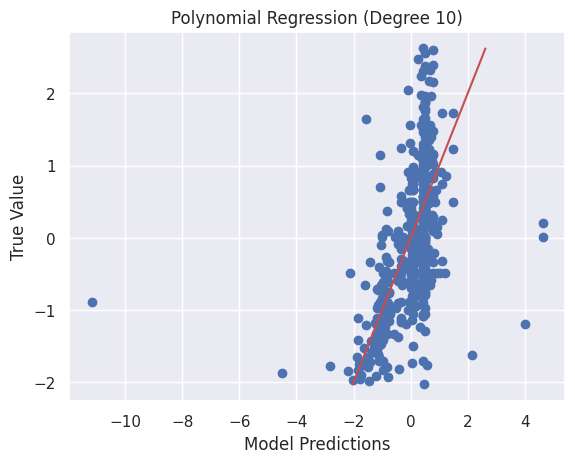

In [116]:
print("Forward Dataframe:\n")
evaluate_polynomial_regression(10, Xf_train, yf_train, Xf_test, yf_test)

### **For Backword Dataframe**

Backward Dataframe:

Train score:  0.6157254118606742
R2 score:  -11721810.981093178


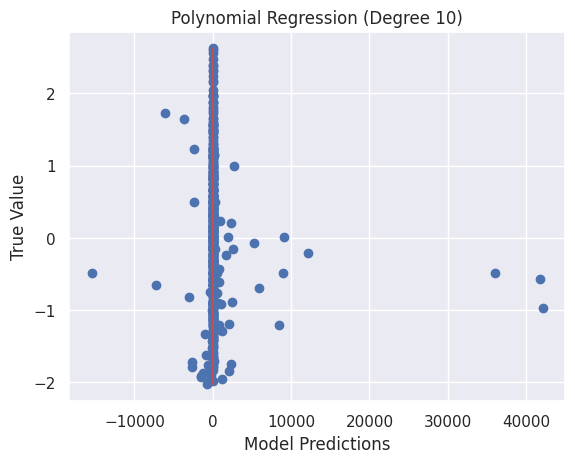

In [117]:
print("Backward Dataframe:\n")
evaluate_polynomial_regression(10, Xb_train, yb_train, Xb_test, yb_test)

### **For Original DataFrame**

Original Dataframe:

Train score:  0.6337847059733985
R2 score:  -154105774118937.03


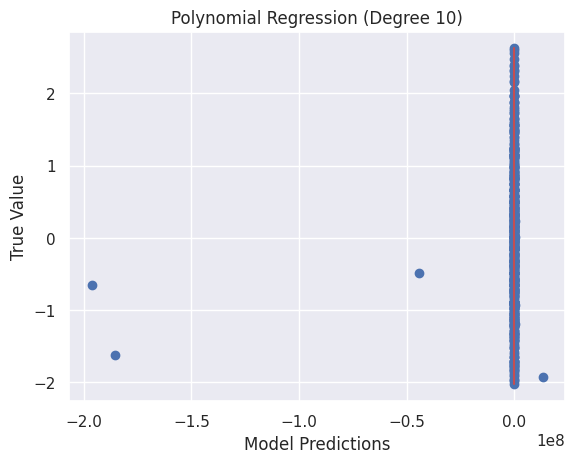

In [118]:
print("Original Dataframe:\n")
evaluate_polynomial_regression(10, X_train, y_train, X_test, y_test)

*we are facing a problem of overfitting*

## **RandomForestRegressor**

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):
    # Create a RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_rf = rf_model.predict(X_test)

    # Print scores
    r2_rf = r2_score(y_test, y_pred_rf)
    print("R2 score (Random Forest):", r2_rf)

    # Scatter plot of predicted vs. true values
    plt.figure(figsize=(8, 8))
    plt.scatter(y_pred_rf, y_test)
    plt.xlabel("Model Predictions (Random Forest)")
    plt.ylabel("True Value")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.title('Random Forest Regression')
    plt.show()

    # Plot one of the decision trees from the Random Forest
    plt.figure(figsize=(20, 10))
    plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, filled=True, rounded=True)
    plt.show()

    return r2_rf



Forward Dataframe:

R2 score (Random Forest): 0.4363007230750907


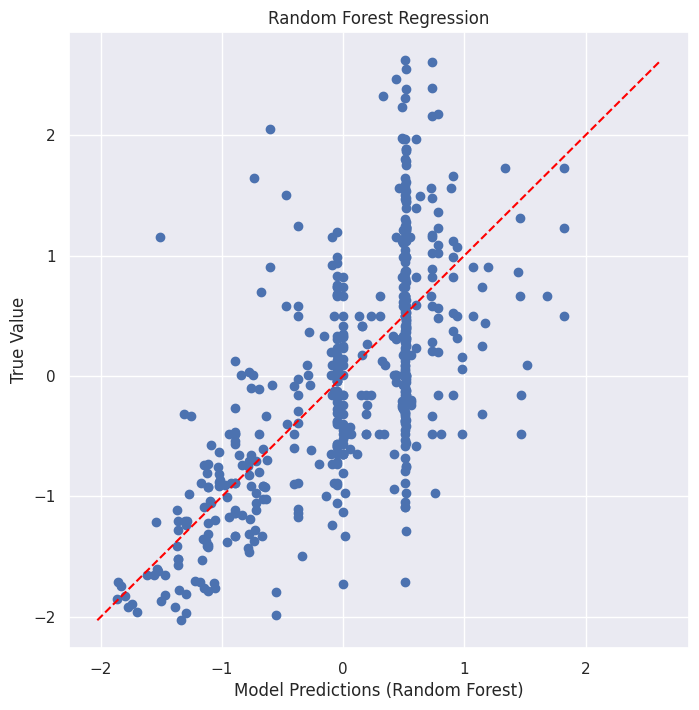

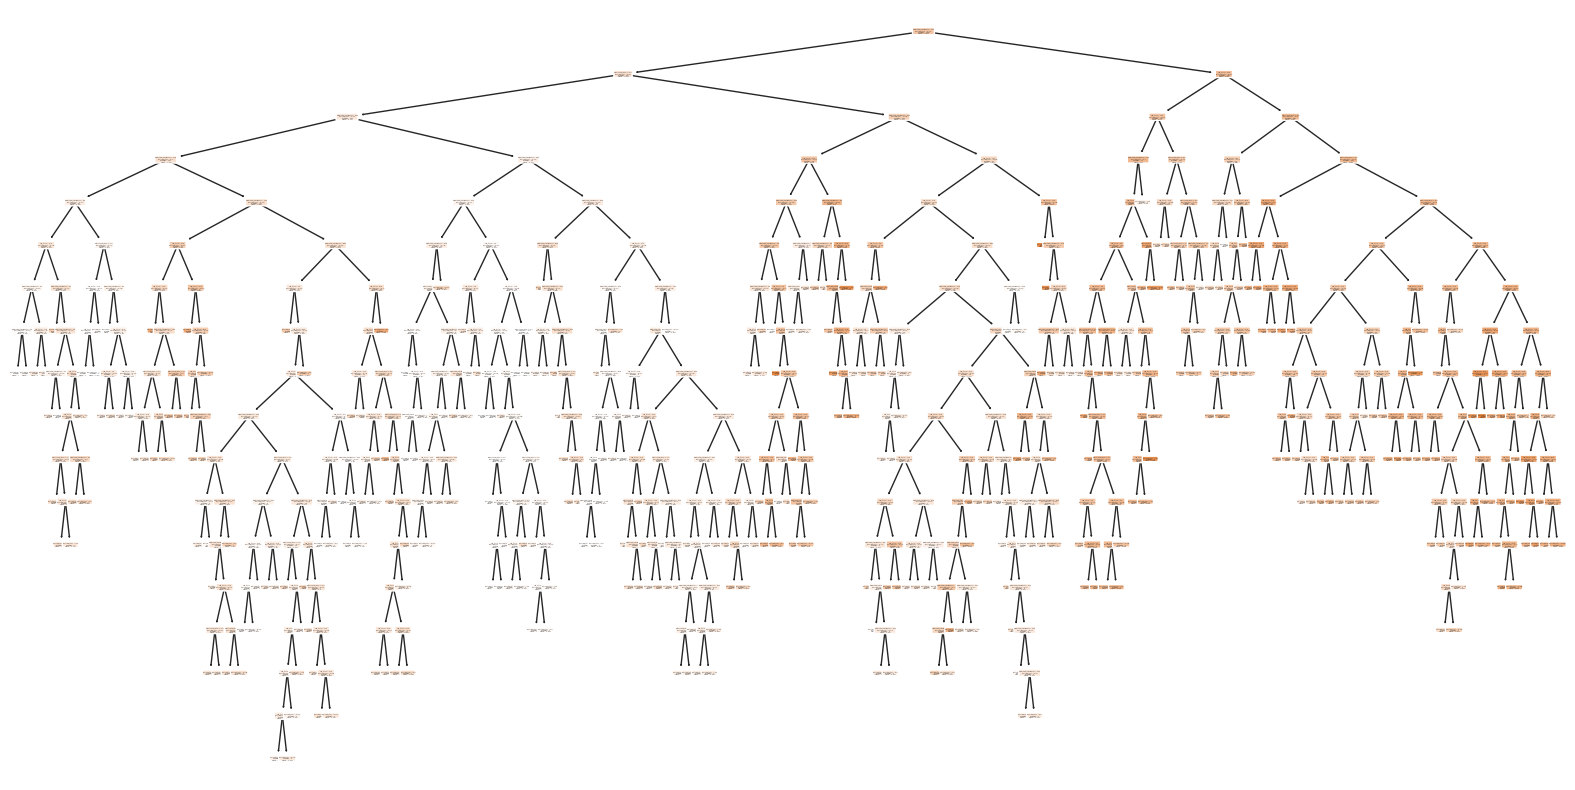

0.4363007230750907

In [120]:
print("Forward Dataframe:\n")
evaluate_random_forest( Xf_train, yf_train, Xf_test, yf_test)

### **For Backword Dataframe**

Backward Dataframe:

R2 score (Random Forest): 0.4158495775233507


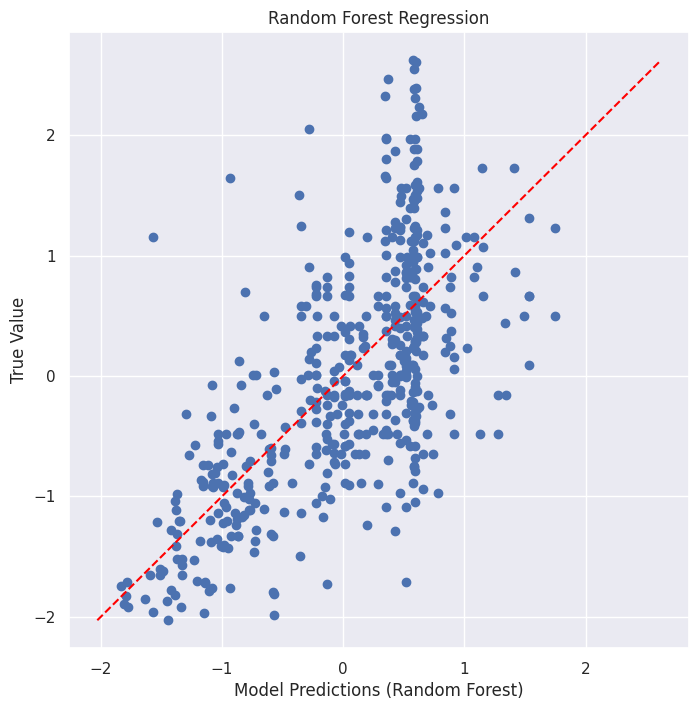

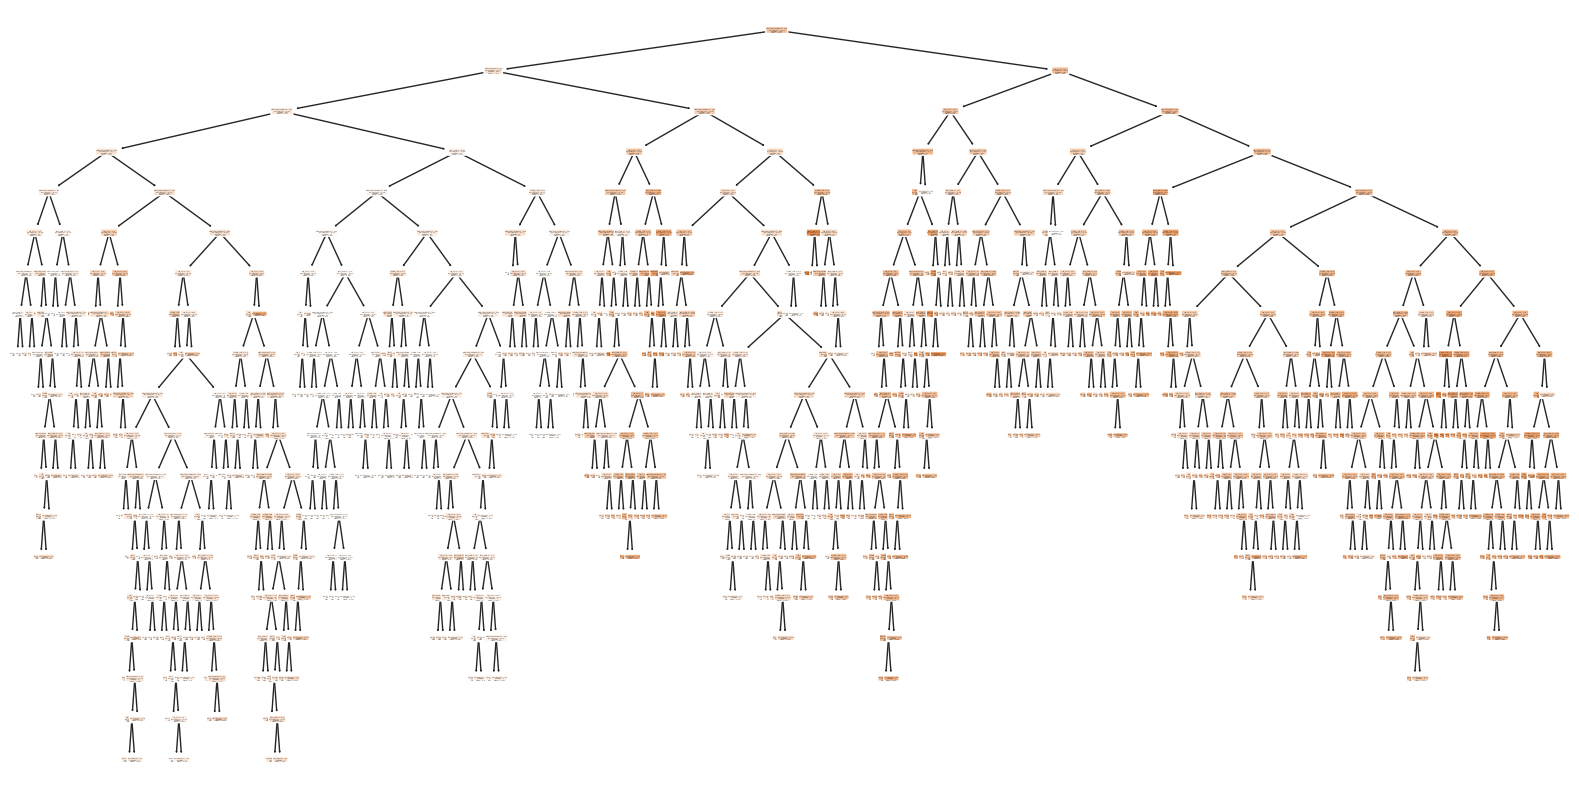

0.4158495775233507

In [121]:
print("Backward Dataframe:\n")
evaluate_random_forest( Xb_train, yb_train, Xb_test, yb_test)

### **For Original DataFrame**

Original Dataframe:

R2 score (Random Forest): 0.41817837523792445


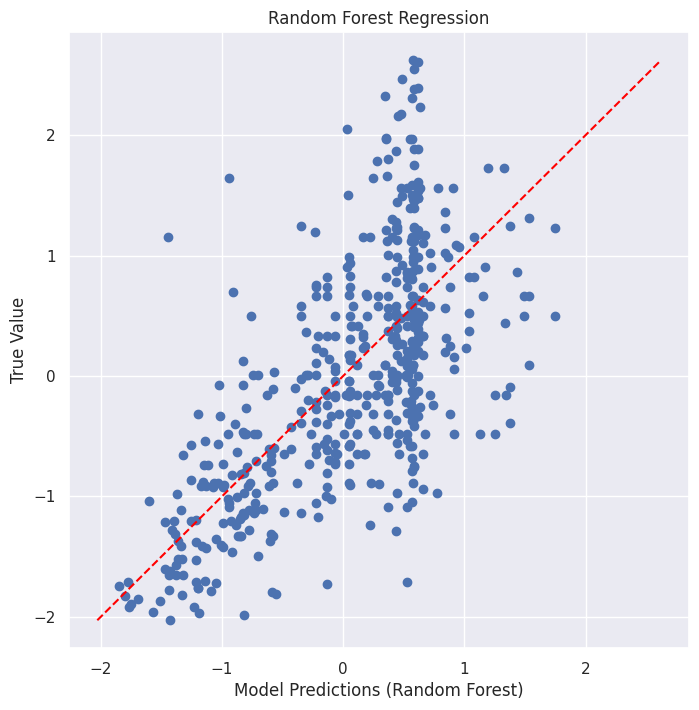

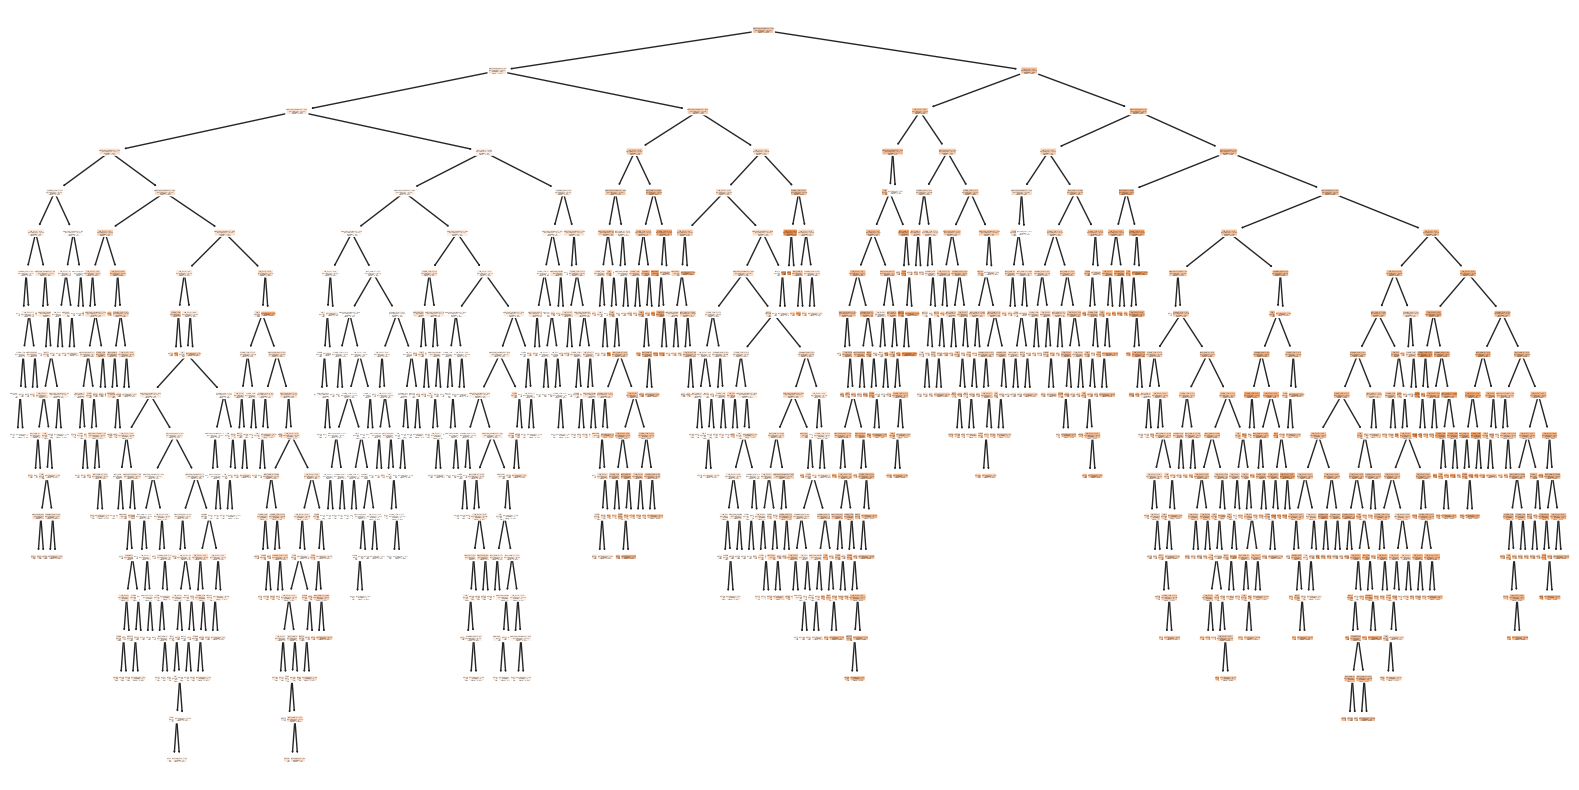

0.41817837523792445

In [122]:
print("Original Dataframe:\n")
evaluate_random_forest( X_train, y_train, X_test, y_test)